##### (3) 编程实现lena.bmp的离散Fourier变换和离散余弦变换，并显示频谱图像。

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2

def grayscale_fft(image):
    """
    对灰度图像进行傅里叶变换并返回频谱
    :param image: 输入的灰度图像，为二维 numpy 数组
    :return: 频谱，为二维 numpy 数组
    """
    # 对图像进行二维傅里叶变换
    f = fftshift(fft2(image))
    # 返回频谱
    return f

In [2]:
def DFT_1(x):
    """
    对一维数组实现DFT并返回频谱
    x: 输入的一维数组
    :return 输入一维数组的频谱
    """
    N = len(x)
    X = np.empty(N,dtype=complex)
    W_N = np.exp(-1j*2*np.pi/N)
    for k in range(N):
        W = W_N ** (np.arange(N)*k)
        X[k] = np.dot(x,W)
    return X

In [3]:
def DCT_1(x):
    """
    对一维数组实现DCT并返回频谱
    x: 输入的一维数组
    :return 输入一维数组的频谱
    """    
    N = len(x)
    X = np.empty(N,dtype=complex)
    for k in range(N):
        W = np.cos((np.arange(1,2*N, 2)*k*np.pi)/(2*N))
        X[k] = np.dot(x,W)
    X[0] = X[0]*np.sqrt(1/N)
    X[1:] = X[1:]*np.sqrt(2/N)
    return X


In [4]:
def img_transfrom(img, funtion, shift=True):
    """
    对灰度图像img实现图像变换,其中变换的一维形式为funtion
    """
    num_row = img.shape[0]
    num_col = img.shape[1]
    spectrum = np.copy(img.astype(complex))

    # 对每行,每列分别做变换
    for row in range(num_row):
        spectrum[row] = funtion(spectrum[row])
    for col in range(num_col):
        spectrum[:,col] = funtion(spectrum[:,col])

    # 将频谱中的直流成分移到中央
    if shift:
        spectrum = np.roll(spectrum, shift=(num_row//2, num_col//2), axis=(0, 1))
    return spectrum

[[142 172 171 ... 160 162 162]
 [146 176 173 ... 160 162 162]
 [115 151 161 ... 160 160 163]
 ...
 [ 92  93  83 ...  52  51  51]
 [ 99 101  93 ...  50  49  46]
 [107 103  99 ...  51  56  44]]


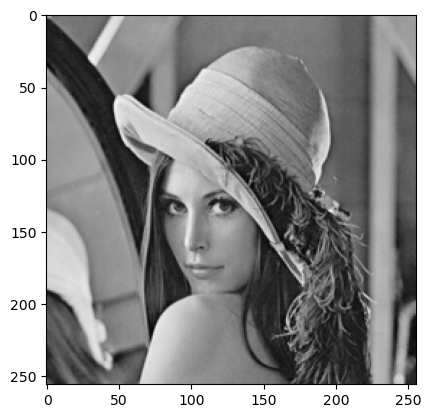

In [5]:
lena_img = np.load('lena_img.npy')
plt.imshow(lena_img,cmap='gray')
print(lena_img)

Text(0.5, 1.0, 'DCT of lena')

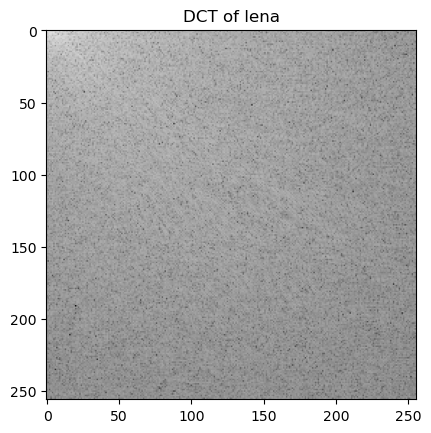

In [6]:
DCT_spectrum = img_transfrom(lena_img,DCT_1,shift=False)
plt.imshow(np.log(np.abs(DCT_spectrum)),cmap='gray')
plt.title('DCT of lena')

Text(0.5, 1.0, 'DFT of lena')

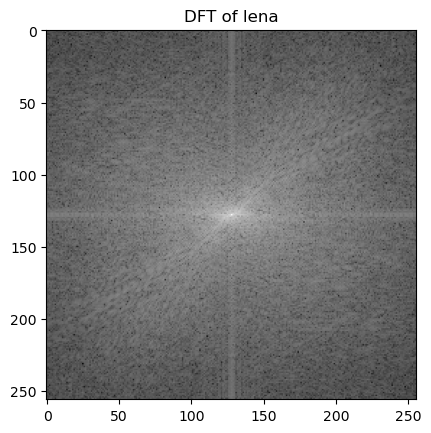

In [7]:
DFT_lena_img = img_transfrom(lena_img,DFT_1)
plt.imshow(np.log(np.abs(DFT_lena_img)),cmap='gray')
plt.title('DFT of lena')

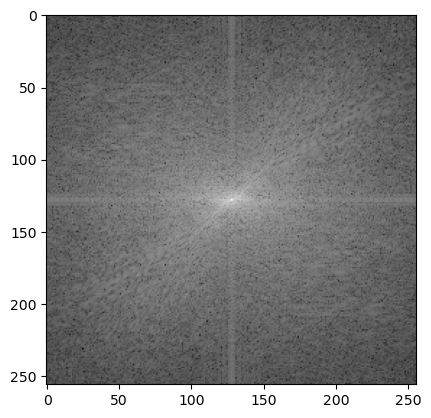

In [8]:
spectrum = grayscale_fft(lena_img)
plt.imshow(np.log(np.abs(spectrum)), cmap='gray')

In [9]:
np.allclose(DFT_lena_img,spectrum)


True

In [10]:
img = np.array([[0,1,1,0,],[0,1,1,0,],[0,1,1,0,],[0,1,1,0,]])
img_transfrom(img,DCT_1)

array([[ 1.57009246e-16+0.j,  3.48630560e-32+0.j, -1.57009246e-16+0.j,
        -8.71576399e-33+0.j],
       [ 2.74766180e-16+0.j,  8.71576399e-32+0.j, -2.74766180e-16+0.j,
        -2.17894100e-32+0.j],
       [-2.00000000e+00+0.j, -4.71027738e-16+0.j,  2.00000000e+00+0.j,
         1.57009246e-16+0.j],
       [-1.57009246e-16+0.j, -1.74315280e-32+0.j,  7.85046229e-17+0.j,
         0.00000000e+00+0.j]])